<a href="https://colab.research.google.com/github/Jose-Gabriel-Rodriguez/MachineLearning/blob/main/Unidad2/4_Random_Forest_Regresion_Automobile.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

![image](https://github.com/JoseGabriel-ITD/Probabilidad-y-Estadistica/blob/main/Cintilla2004.png?raw=true)

# **Machine Learning y Deep Learning**

## Unidad 2

### Practica 4: **Random Forest**

### Facilitador: *Dr. José Gabriel Rodríguez Rivas*

### Alumno:  _____________

**Random Forest** es un algoritmo de ensamble **basado en múltiples árboles de decisión**. Las principales características son:

- Construye varios árboles (normalmente cientos) y promedia sus resultados.
- Reduce el sobreajuste que puede tener un solo árbol.
- Proporciona mejor generalización que un árbol individual.
- Puede manejar relaciones no lineales y detectar interacciones entre variables.

**Diferencias frente a Regresión Lineal y Árboles de Decisión:**

| Técnica              | Linealidad | Flexibilidad | Overfitting | Interpretabilidad |
|----------------------|------------|--------------|-------------|-------------------|
| Regresión Lineal     | Alta       | Baja         | Baja        | Alta              |
| Árbol de Decisión    | Baja       | Media        | Alta        | Media             |
| Random Forest        | Baja       | Alta         | Baja        | Baja              |

Random Forest es una excelente opción cuando se quiere mejorar la precisión sin preocuparse tanto por la interpretabilidad.


## **1. Cargar datos y librerías**

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score

# Cargar el dataset
df = pd.read_csv("autos2.csv")
df.head()


,symboling,normalized-losses,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,...,peak-rpm,city-mpg,highway-L/100km,price,city-L/100km,fuel-type_code,diesel,gas,fuel-type-map,horsepower-binned
0,3,122,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,5000.0,21,8.703704,13495.0,11.190476,1,False,True,1,Low
1,3,122,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,5000.0,21,8.703704,16500.0,11.190476,1,False,True,1,Low
2,1,122,alfa-romero,gas,std,two,hatchback,rwd,front,94.5,...,5000.0,19,9.038462,16500.0,12.368421,1,False,True,1,Medium
3,2,164,audi,gas,std,four,sedan,fwd,front,99.8,...,5500.0,24,7.833333,13950.0,9.791667,1,False,True,1,Low
4,2,164,audi,gas,std,four,sedan,4wd,front,99.4,...,5500.0,18,10.681818,17450.0,13.055556,1,False,True,1,Low


## **2. Definir variables predictoras y variable objetivo**

In [2]:
X = df[['horsepower', 'engine-size', 'city-mpg', 'wheel-base', 'bore']]
y = df['price']


## **3. Dividir en conjunto de entrenamiento y prueba**

In [3]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


## **4. Entrenar modelo Random Forest**

In [4]:
rf_model = RandomForestRegressor(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)


RandomForestRegressor(random_state=42)

## **5. Evaluar el modelo**

In [5]:
y_pred_rf = rf_model.predict(X_test)

mse_rf = mean_squared_error(y_test, y_pred_rf)
r2_rf = r2_score(y_test, y_pred_rf)

print(f"Error cuadrático medio (MSE): {mse_rf:.2f}")
print(f"Coeficiente de determinación (R²): {r2_rf:.2f}")


Error cuadrático medio (MSE): 9610978.35
Coeficiente de determinación (R²): 0.92


In [6]:
import numpy as np
# Calcular el RMSE (mas facil de interpretar que el MSE)
rmse = np.sqrt(mse_rf)
print(f"Raíz del Error cuadrático medio (RMSE): {rmse:.2f}")

Raíz del Error cuadrático medio (RMSE): 3100.16


### **Interpretación**
#### **1. MSE / RMSE**

* El RMSE ≈ 3,100 nos dice que, en promedio, las predicciones de precio tienen un error de aproximadamente 3,100.
* Considerando que la mayoría de los autos están entre 8,000 y 16,000, este error representa aproximadamente entre 19% y 40% del precio, lo cual es aceptable pero no óptimo.

#### **2. R² = 0.92**

* El modelo explica el 92% de la variación del precio de los autos.
* Es un muy buen ajuste, especialmente considerando que Random Forest es un modelo robusto y no lineal.
* El RMSE  es ligeramente peor con respecto a arboles ≈ 3,030 vs ≈ 3,100

* El modelo **puede necesitar ajuste de hiperparámetros** (max_depth, min_samples_split, n_estimators...).

* Las variables predictoras pueden tener límite en su capacidad explicativa del precio

## **6. Comparar precios reales vs predichos**

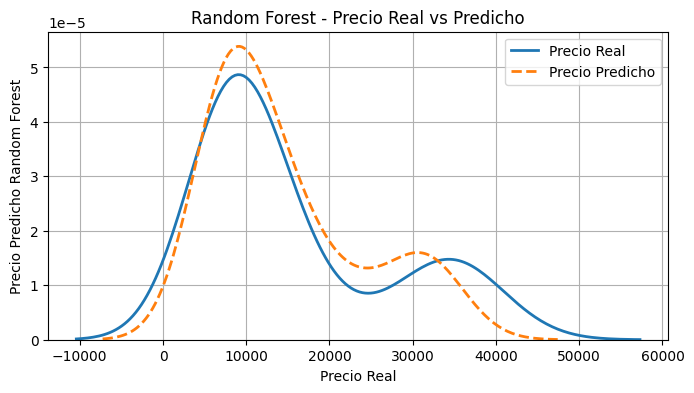

In [7]:
# Comparación visual de distribuciones
plt.figure(figsize=(8, 4))

sns.kdeplot(y_test, label='Precio Real', linewidth=2)
sns.kdeplot(y_pred_rf, label='Precio Predicho', linewidth=2, linestyle='--')

plt.title('Random Forest - Precio Real vs Predicho')
plt.xlabel('Precio Real')
plt.ylabel('Precio Predicho Random Forest')
plt.legend()
plt.grid(True)
plt.show()

## **Parámetros ajustables en Random Forest**
En un Random Forest Regressor (Bosque Aleatorio de Regresión) hay varios parámetros que puedes ajustar para mejorar o analizar el desempeño (MSE, R², RMSE, etc.).

A continuación, se muestran los parámetros más importantes, explicados de manera clara y práctica:


| Parámetro               | Tipo                                                           | Qué hace                                                  | Efecto en el rendimiento                                                                |
| ----------------------- | -------------------------------------------------------------- | --------------------------------------------------------- | --------------------------------------------------------------------------------------- |
| **`n_estimators`**      | int (por defecto 100)                                          | Número de árboles en el bosque                            | ↑ Mejores resultados con más árboles (hasta cierto punto), pero mayor tiempo de cómputo |
| **`max_depth`**         | int o None                                                     | Profundidad máxima de cada árbol                          | ↓ Menor sobreajuste con valores bajos; ↑ mayor ajuste con valores altos                 |
| **`min_samples_split`** | int o float                                                    | Número mínimo de muestras requeridas para dividir un nodo | ↑ Aumentarlo simplifica el modelo (menos sobreajuste)                                   |
| **`min_samples_leaf`**  | int o float                                                    | Mínimo de muestras por hoja                               | ↑ Evita nodos con pocos datos, reduce sobreajuste                                       |
| **`max_features`**      | {"auto", "sqrt", "log2"} o int/float                           | Número de variables consideradas por árbol                | Cambiarlo afecta la diversidad de árboles (√ suele ser buena opción)                    |
| **`bootstrap`**         | bool                                                           | Si se usa muestreo con reemplazo                          | `True` = aleatoriedad y robustez, `False` = más determinista                            |
| **`random_state`**      | int                                                            | Fija la semilla aleatoria                                 | Asegura resultados reproducibles                                                        |
| **`criterion`**         | {"squared_error", "absolute_error", "friedman_mse", "poisson"} | Métrica usada para medir el error dentro del árbol        | Puedes probar `absolute_error` si hay valores atípicos                                  |


In [8]:
# Modelo con parámetros ajustados
rf_model = RandomForestRegressor(
    n_estimators=200,       # más árboles
    max_depth=8,            # limitar profundidad
    min_samples_split=4,    # evitar divisiones con pocos datos
    min_samples_leaf=3,     # cada hoja al menos con 3 observaciones
    max_features='sqrt',    # usa raíz cuadrada del total de features
    random_state=42
)

rf_model.fit(X_train, y_train)
y_pred = rf_model.predict(X_test)

mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"MSE: {mse:.2f}")
print(f"R²: {r2:.2f}")
print(f"RMSE: {np.sqrt(mse):.2f}")


MSE: 14091439.04
R²: 0.88
RMSE: 3753.86


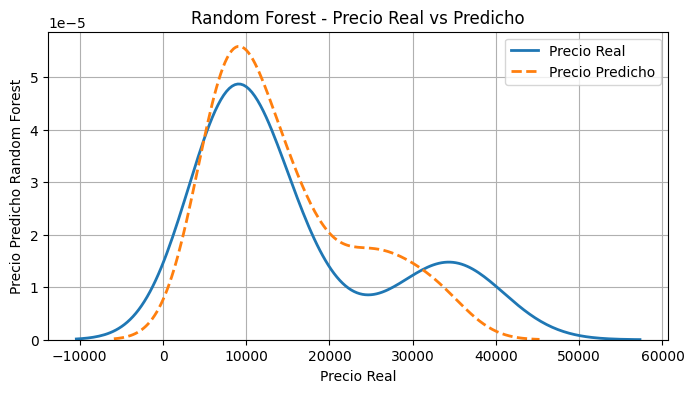

In [10]:
# Comparación visual de distribuciones
plt.figure(figsize=(8, 4))

sns.kdeplot(y_test, label='Precio Real', linewidth=2)
sns.kdeplot(y_pred, label='Precio Predicho', linewidth=2, linestyle='--')

plt.title('Random Forest - Precio Real vs Predicho')
plt.xlabel('Precio Real')
plt.ylabel('Precio Predicho Random Forest')
plt.legend()
plt.grid(True)
plt.show()

## **Ajuste automático (búsqueda de mejores parámetros)**

* Se puede usar Grid Search o Randomized Search para probar varias combinaciones automáticamente.  
* **GridSearchCV** es una herramienta de **Scikit-Learn** que se utiliza para **optimizar hiperparámetros de modelos de machine learning** de forma sistemática y eficiente.  

### **¿Qué hace GridSearchCV?**
* GridSearchCV realiza una búsqueda exhaustiva sobre un conjunto de hiperparámetros especificados para encontrar la mejor combinación que maximice (o minimice) una métrica de evaluación, como la precisión, el R², el F1-score, etc.

### **¿Cómo funciona?**
* Define un espacio de búsqueda: el usuario especifica qué valores quiere probar para cada hiperparámetro.  
* Entrena el modelo con cada combinación de esos valores.  
* Evalúa cada modelo usando validación cruzada (por ejemplo, cv=3 divide los datos en 3 partes).
* Selecciona la mejor combinación según la métrica que elijas (scoring).  

### **¿En qué modelos se puede aplicar?**
GridSearchCV se puede usar con cualquier estimador de Scikit-Learn que tenga hiperparámetros, incluyendo:  

### **Modelos de regresión:**
* LinearRegression
* SVR (Support Vector Regressor)
* RandomForestRegressor
* GradientBoostingRegressor
Ridge, Lasso, ElasticNet

### **Modelos de clasificación:**
* LogisticRegression
* SVC (Support Vector Classifier)
* RandomForestClassifier
* KNeighborsClassifier
* GradientBoostingClassifier
* DecisionTreeClassifier


### **Modelos de clustering (con ciertas adaptaciones):**
* KMeans (por ejemplo, para elegir el número de clusters)



In [9]:
from sklearn.model_selection import GridSearchCV

param_grid = {
    'n_estimators': [100, 200, 300],
    'max_depth': [4, 6, 8, None],
    'min_samples_split': [2, 4, 6],
    'min_samples_leaf': [1, 2, 3],
    'max_features': ['sqrt', 'log2']
}

grid_search = GridSearchCV(
    RandomForestRegressor(random_state=42),
    param_grid,
    cv=3,                # validación cruzada
    scoring='r2',
    n_jobs=-1,
    verbose=2
)

grid_search.fit(X_train, y_train)
print("Mejores parámetros:", grid_search.best_params_)
print("Mejor R²:", grid_search.best_score_)


Fitting 3 folds for each of 216 candidates, totalling 648 fits
Mejores parámetros: {'max_depth': 8, 'max_features': 'sqrt', 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 300}
Mejor R²: 0.8587725936185243
